In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\AI\heart.csv")

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df["target"].unique()

array([0, 1], dtype=int64)

In [9]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

### Checking NaNs

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Detect Error

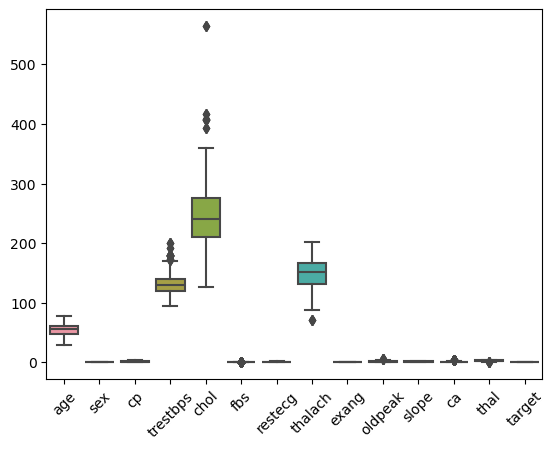

In [12]:
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
cols = ['trestbps', 'chol', 'fbs', 'thalach',
       'oldpeak', 'ca', 'thal']

In [15]:
cols

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [17]:
for c in cols:
    sk = df[c].skew().round()
    if sk == 0 or sk == -0:
        m = df[c].mean()
        s = df[c].std()
        lower = m - 3 * s
        upper = m + 3 * s
        df[c] = df[c].map(lambda x : lower if x < lower else upper if x > upper else x)
    else :
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q1 - q3
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        df[c] = df[c].map(lambda x : low if x < low else high if x > high else x )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal'),
  Text(13, 0, 'target')])

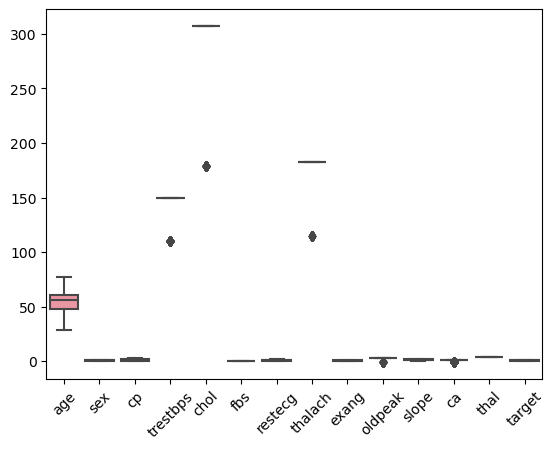

In [19]:
sns.boxplot(df)
plt.xticks(rotation = 45)

### Imbalance

In [20]:
df["target"]

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [21]:
df["target"].unique()

array([0, 1], dtype=int64)

In [22]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

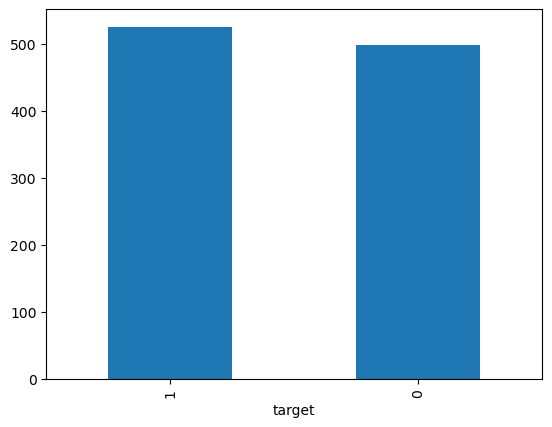

In [23]:
df["target"].value_counts().plot(kind = "bar")

### Data Separation

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,150.0,307.0,0.0,1,183.0,0,2.7,2,-0.5,3.5,0
1,53,1,0,150.0,307.0,0.0,0,183.0,1,-0.9,0,1.5,3.5,0
2,70,1,0,150.0,307.0,0.0,1,183.0,1,2.7,0,1.5,3.5,0
3,61,1,0,150.0,307.0,0.0,1,183.0,0,2.7,2,1.5,3.5,0
4,62,0,0,150.0,307.0,0.0,1,183.0,0,2.7,1,-0.5,3.5,0


In [26]:
df.drop("target",axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,150.0,307.0,0.0,1,183.0,0,2.7,2,-0.5,3.5
1,53,1,0,150.0,307.0,0.0,0,183.0,1,-0.9,0,1.5,3.5
2,70,1,0,150.0,307.0,0.0,1,183.0,1,2.7,0,1.5,3.5
3,61,1,0,150.0,307.0,0.0,1,183.0,0,2.7,2,1.5,3.5
4,62,0,0,150.0,307.0,0.0,1,183.0,0,2.7,1,-0.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,150.0,307.0,0.0,1,183.0,1,2.7,2,1.5,3.5
1021,60,1,0,150.0,307.0,0.0,0,183.0,1,-0.9,1,1.5,3.5
1022,47,1,0,150.0,307.0,0.0,0,183.0,1,2.7,1,1.5,3.5
1023,50,0,0,150.0,307.0,0.0,0,183.0,0,2.7,2,1.5,3.5


In [27]:
x = df.drop("target",axis=1)

In [28]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,150.0,307.0,0.0,1,183.0,0,2.7,2,-0.5,3.5
1,53,1,0,150.0,307.0,0.0,0,183.0,1,-0.9,0,1.5,3.5
2,70,1,0,150.0,307.0,0.0,1,183.0,1,2.7,0,1.5,3.5
3,61,1,0,150.0,307.0,0.0,1,183.0,0,2.7,2,1.5,3.5
4,62,0,0,150.0,307.0,0.0,1,183.0,0,2.7,1,-0.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,150.0,307.0,0.0,1,183.0,1,2.7,2,1.5,3.5
1021,60,1,0,150.0,307.0,0.0,0,183.0,1,-0.9,1,1.5,3.5
1022,47,1,0,150.0,307.0,0.0,0,183.0,1,2.7,1,1.5,3.5
1023,50,0,0,150.0,307.0,0.0,0,183.0,0,2.7,2,1.5,3.5


In [29]:
y = df["target"]

In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

### Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.20)

In [33]:
x.shape, x_train.shape

((1025, 13), (820, 13))

In [34]:
y.shape

(1025,)

In [38]:
from sklearn.svm import SVC

In [39]:
svm_model = SVC()

In [40]:
svm_model

SVC()

In [41]:
svm_model.fit(x_train,y_train)

SVC()

In [42]:
svm_model.score(x_test,y_test)

0.5414634146341464

In [47]:
slist = []
for i in range(1000):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y , test_size = 0.20, random_state = i)
    svc = SVC()
    svc.fit(xtrain,ytrain)
    s = svc.score(xtest,ytest)
    slist.append(s)
m = max(slist)
print(m,end = "==>")
a = slist.index(m)
print(a)

0.6878048780487804==>924
